Processing files from multiple models...
Processed: grok/phase2/experiment1/run1: 11 passed
Processed: grok/phase2/experiment1/run2: 15 passed
Processed: grok/phase2/experiment1/run3: 14 passed
Processed: grok/phase2/experiment2/run1: 18 passed
Processed: grok/phase2/experiment2/run2: 16 passed
Processed: grok/phase2/experiment2/run3: 17 passed
Processed: grok/phase2/experiment3/run1: 17 passed
Processed: grok/phase2/experiment3/run2: 16 passed
Processed: grok/phase2/experiment3/run3: 14 passed
Processed: grok/phase3/experiment1/run1: 20 passed
Processed: grok/phase3/experiment1/run2: 20 passed
Processed: grok/phase3/experiment1/run3: 20 passed
Processed: grok/phase3/experiment2/run1: 20 passed
Processed: grok/phase3/experiment2/run2: 20 passed
Processed: grok/phase3/experiment2/run3: 20 passed
Processed: grok/phase3/experiment3/run1: 20 passed
Processed: grok/phase3/experiment3/run2: 20 passed
Processed: grok/phase3/experiment3/run3: 20 passed
Processed: mistral/phase2/experiment1/run

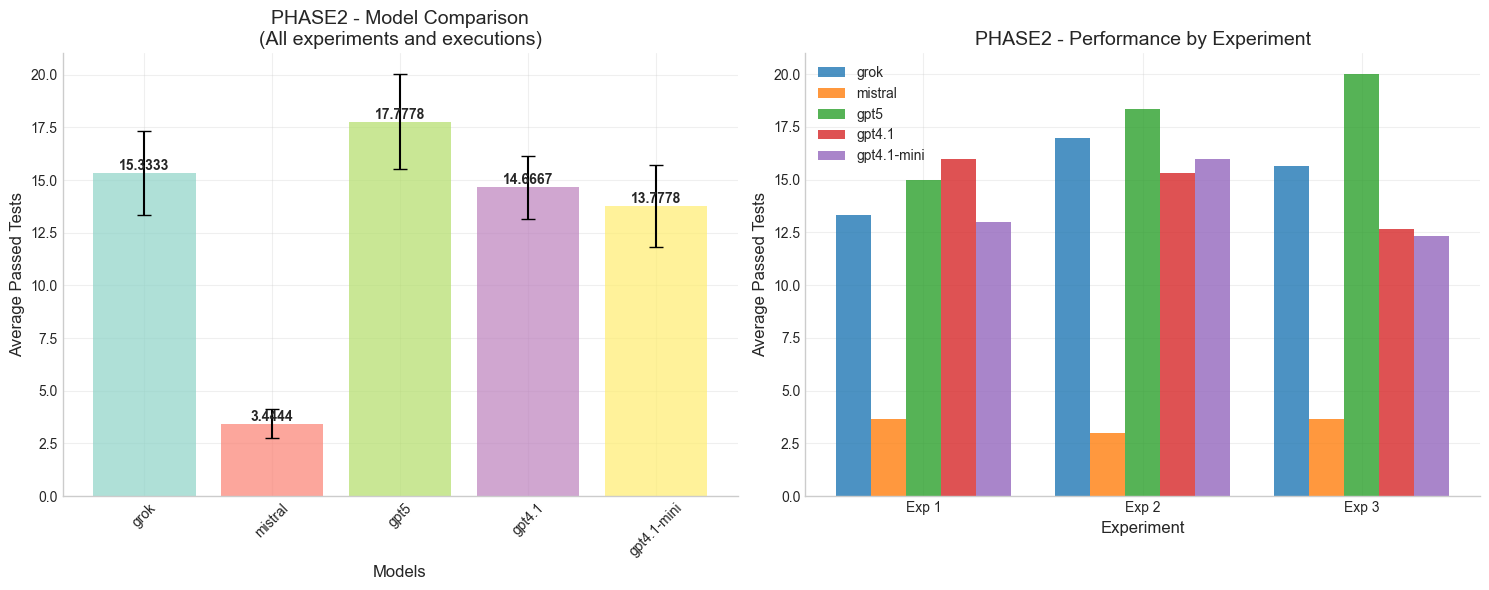


BEST MODEL FOR PHASE2: gpt5 (17.7778)

ANALYSIS FOR PHASE3

grok - phase3:
  Overall: 20.0000 ± 0.0000
  experiment1: [20, 20, 20] -> 20.0000
  experiment2: [20, 20, 20] -> 20.0000
  experiment3: [20, 20, 20] -> 20.0000

mistral - phase3:
  Overall: 13.2222 ± 1.0304
  experiment1: [13, 12, 12] -> 12.3333
  experiment2: [14, 13, 14] -> 13.6667
  experiment3: [12, 14, 15] -> 13.6667

gpt5 - phase3:
  Overall: 19.8889 ± 0.3143
  experiment1: [19, 20, 20] -> 19.6667
  experiment2: [20, 20, 20] -> 20.0000
  experiment3: [20, 20, 20] -> 20.0000

gpt4.1 - phase3:
  Overall: 19.8889 ± 0.3143
  experiment1: [20, 20, 20] -> 20.0000
  experiment2: [20, 20, 20] -> 20.0000
  experiment3: [20, 19, 20] -> 19.6667

gpt4.1-mini - phase3:
  Overall: 18.8889 ± 0.8749
  experiment1: [19, 18, 19] -> 18.6667
  experiment2: [20, 20, 19] -> 19.6667
  experiment3: [19, 17, 19] -> 18.3333
Plot saved as: phase3_model_comparison.png


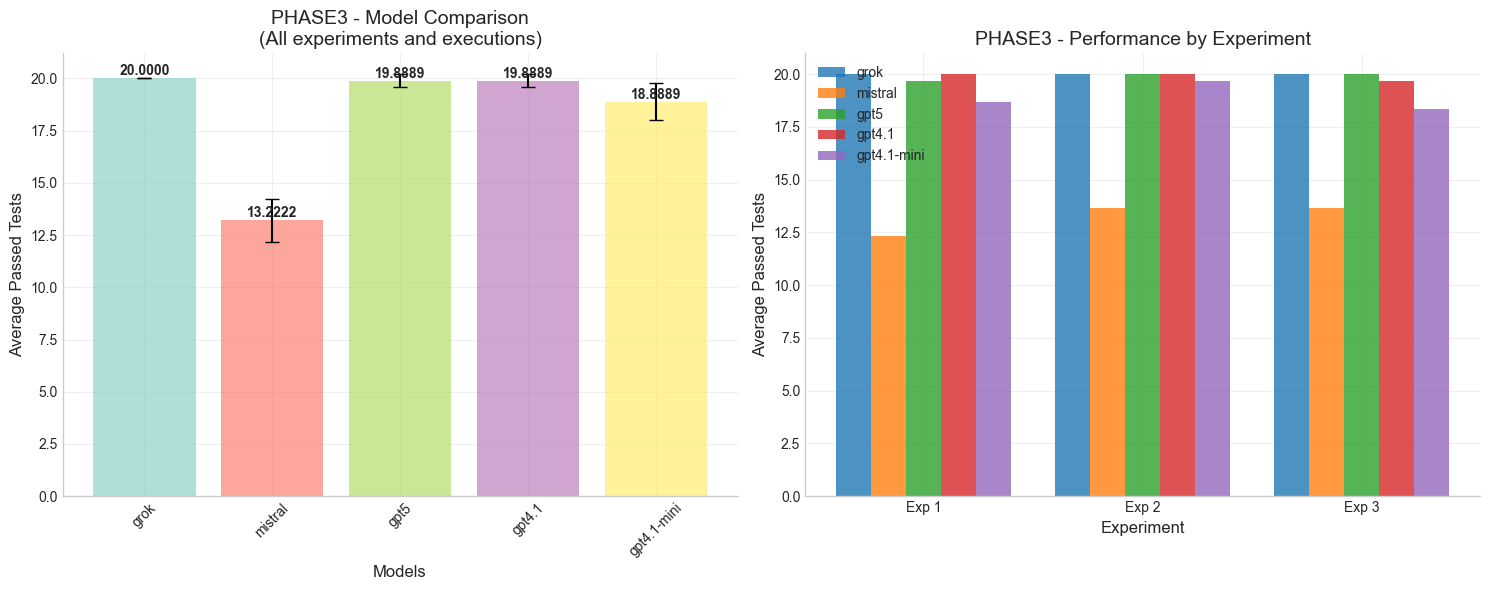


BEST MODEL FOR PHASE3: grok (20.0000)

CROSS-PHASE COMPARISON SUMMARY

grok:
  Phase 2: 15.3333
  Phase 3: 20.0000
  Improvement: +30.43%
Significant improvement in Phase 3

mistral:
  Phase 2: 3.4444
  Phase 3: 13.2222
  Improvement: +283.87%
Significant improvement in Phase 3

gpt5:
  Phase 2: 17.7778
  Phase 3: 19.8889
  Improvement: +11.87%
Significant improvement in Phase 3

gpt4.1:
  Phase 2: 14.6667
  Phase 3: 19.8889
  Improvement: +35.61%
Significant improvement in Phase 3

gpt4.1-mini:
  Phase 2: 13.7778
  Phase 3: 18.8889
  Improvement: +37.10%
Significant improvement in Phase 3

Cross-phase comparison plot saved as: cross_phase_comparison.png


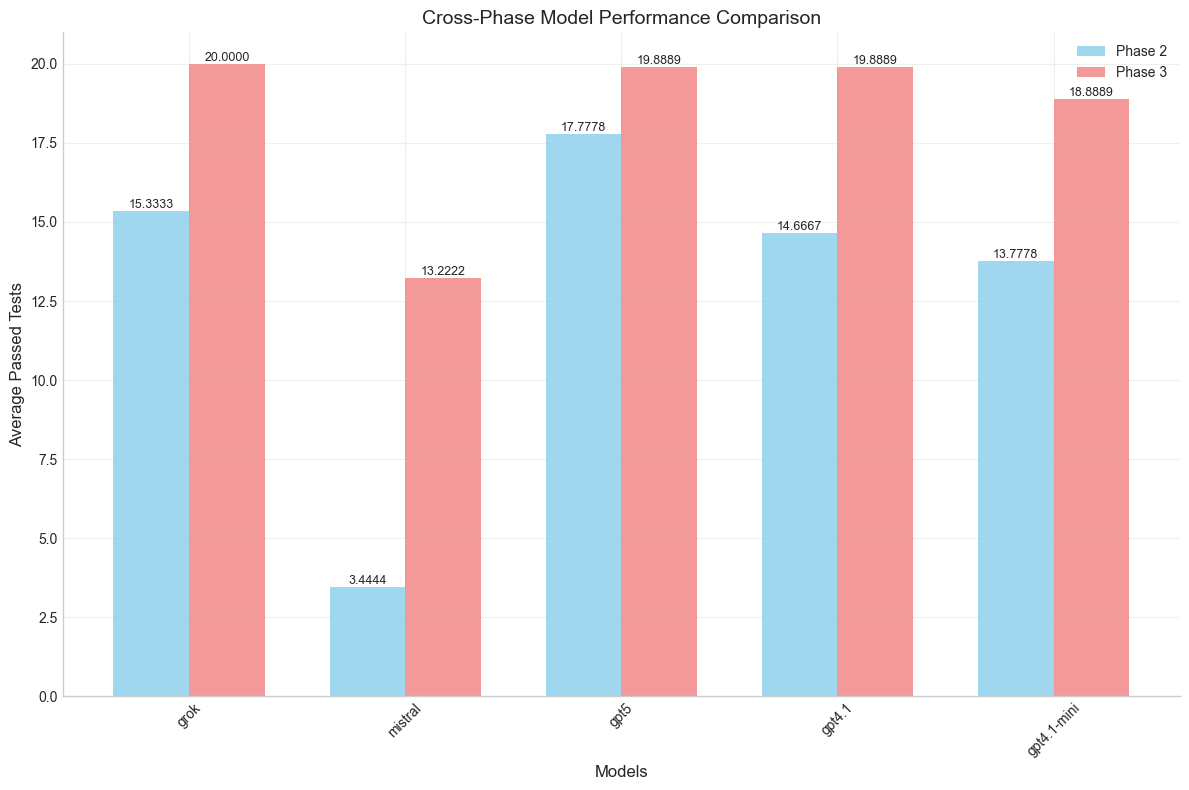


FINAL EXECUTIVE SUMMARY
Models analyzed: ['grok', 'mistral', 'gpt5', 'gpt4.1', 'gpt4.1-mini']
Phases analyzed: Phase 2, Phase 3
Experiments per phase: 3
Executions per experiment: 3

BEST MODEL FOR PHASE 2: gpt5 (17.7778)
BEST MODEL FOR PHASE 3: grok (20.0000)


In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('seaborn-v0_8-whitegrid')

# =============================================
# CONFIGURACIÓN - REEMPLAZA ESTAS RUTAS
# =============================================

# Estructura: Modelos -> Fases -> Experimentos -> Ejecuciones
file_paths = {
    'grok': {
        'phase2': {  
            'experiment1': [
                "../runs/grok/trial-01/exp-01/phase2/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-01/phase2/eval/elsevier_ttls_results.json", 
                "../runs/grok/trial-03/exp-01/phase2/eval/elsevier_ttls_results.json"
            ],
            'experiment2': [
                "../runs/grok/trial-01/exp-02/phase2/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-02/phase2/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-03/exp-02/phase2/eval/elsevier_ttls_results.json"
            ],
            'experiment3': [
                "../runs/grok/trial-01/exp-03/phase2/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-03/phase2/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-03/exp-03/phase2/eval/elsevier_ttls_results.json"
            ]
        },
        'phase3': {  
            'experiment1': [
                "../runs/grok/trial-01/exp-01/phase3/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-01/phase3/eval/elsevier_ttls_results.json", 
                "../runs/grok/trial-03/exp-01/phase3/eval/elsevier_ttls_results.json"
            ],
            'experiment2': [
                "../runs/grok/trial-01/exp-02/phase3/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-02/phase3/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-03/exp-02/phase3/eval/elsevier_ttls_results.json"
            ],
            'experiment3': [
                "../runs/grok/trial-01/exp-03/phase3/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-02/exp-03/phase3/eval/elsevier_ttls_results.json",
                "../runs/grok/trial-03/exp-03/phase3/eval/elsevier_ttls_results.json"
            ]
        }
    },
    'mistral': {
        'phase2': {  
            'experiment1': [
                "../runs/mistral/trial-01/exp-01/phase2/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-01/phase2/eval/elsevier_ttls_results.json", 
                "../runs/mistral/trial-03/exp-01/phase2/eval/elsevier_ttls_results.json"
            ],
            'experiment2': [
                "../runs/mistral/trial-01/exp-02/phase2/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-02/phase2/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-03/exp-02/phase2/eval/elsevier_ttls_results.json"
            ],
            'experiment3': [
                "../runs/mistral/trial-01/exp-03/phase2/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-03/phase2/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-03/exp-03/phase2/eval/elsevier_ttls_results.json"
            ]
        },
        'phase3': {  
            'experiment1': [
                "../runs/mistral/trial-01/exp-01/phase3/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-01/phase3/eval/elsevier_ttls_results.json", 
                "../runs/mistral/trial-03/exp-01/phase3/eval/elsevier_ttls_results.json"
            ],
            'experiment2': [
                "../runs/mistral/trial-01/exp-02/phase3/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-02/phase3/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-03/exp-02/phase3/eval/elsevier_ttls_results.json"
            ],
            'experiment3': [
                "../runs/mistral/trial-01/exp-03/phase3/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-02/exp-03/phase3/eval/elsevier_ttls_results.json",
                "../runs/mistral/trial-03/exp-03/phase3/eval/elsevier_ttls_results.json"
            ]
        }
    },
    'gpt5': {
        'phase2': {  
            'experiment1': [
                "../runs/gpt5/trial-01/exp-01/phase2/eval/1_exp1_gpt5_phase2_results.json",
                "../runs/gpt5/trial-02/exp-01/phase2/eval/2_exp1_gpt5_phase2_results.json",
                "../runs/gpt5/trial-03/exp-01/phase2/eval/3_exp1_gpt5_phase2_results.json"
            ],
            'experiment2': [
               "../runs/gpt5/trial-01/exp-02/phase2/eval/1_exp2_gpt5_phase2_results.json",
                "../runs/gpt5/trial-02/exp-02/phase2/eval/2_exp2_gpt5_phase2_results.json",
                "../runs/gpt5/trial-03/exp-02/phase2/eval/3_exp2_gpt5_phase2_results.json"
            ],
            'experiment3': [
               "../runs/gpt5/trial-01/exp-03/phase2/eval/1_exp3_gpt5_phase2_results.json",
                "../runs/gpt5/trial-02/exp-03/phase2/eval/2_exp3_gpt5_phase2_results.json",
                "../runs/gpt5/trial-03/exp-03/phase2/eval/3_exp3_gpt5_phase2_results.json"
            ]
        },
        'phase3': {  
            'experiment1': [
                "../runs/gpt5/trial-01/exp-01/phase3/eval/1_exp1_gpt5_phase3_results.json",
                "../runs/gpt5/trial-02/exp-01/phase3/eval/2_exp1_gpt5_phase3_results.json",
                "../runs/gpt5/trial-03/exp-01/phase3/eval/3_exp1_gpt5_phase3_results.json"
            ],
            'experiment2': [
                "../runs/gpt5/trial-01/exp-02/phase3/eval/1_exp2_gpt5_phase3_results.json",
                "../runs/gpt5/trial-02/exp-02/phase3/eval/2_exp2_gpt5_phase3_results.json",
                "../runs/gpt5/trial-03/exp-02/phase3/eval/3_exp2_gpt5_phase3_results.json"
            ],
            'experiment3': [
                "../runs/gpt5/trial-01/exp-03/phase3/eval/1_exp3_gpt5_phase3_results.json",
                "../runs/gpt5/trial-02/exp-03/phase3/eval/2_exp3_gpt5_phase3_results.json",
                "../runs/gpt5/trial-03/exp-03/phase3/eval/3_exp3_gpt5_phase3_results.json"
            ]
        }
    },
    'gpt4.1': {
        'phase2': {  
            'experiment1': [
                "../runs/gpt4.1/trial-01/exp-01/phase2/eval/1_exp1_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-02/exp-01/phase2/eval/2_exp1_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-03/exp-01/phase2/eval/3_exp1_gpt4.1_phase2_results.json"
            ],
            'experiment2': [
                "../runs/gpt4.1/trial-01/exp-02/phase2/eval/1_exp2_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-02/exp-02/phase2/eval/2_exp2_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-03/exp-02/phase2/eval/3_exp2_gpt4.1_phase2_results.json"
            ],
            'experiment3': [
                "../runs/gpt4.1/trial-01/exp-03/phase2/eval/1_exp3_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-02/exp-03/phase2/eval/2_exp3_gpt4.1_phase2_results.json",
                "../runs/gpt4.1/trial-03/exp-03/phase2/eval/3_exp3_gpt4.1_phase2_results.json"
            ]
        },
        'phase3': {  
            'experiment1': [
                "../runs/gpt4.1/trial-01/exp-01/phase3/eval/1_exp1_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-02/exp-01/phase3/eval/2_exp1_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-03/exp-01/phase3/eval/3_exp1_gpt4.1_phase3_results.json"
            ],
            'experiment2': [
                "../runs/gpt4.1/trial-01/exp-02/phase3/eval/1_exp2_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-02/exp-02/phase3/eval/2_exp2_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-03/exp-02/phase3/eval/3_exp2_gpt4.1_phase3_results.json"
            ],
            'experiment3': [
                "../runs/gpt4.1/trial-01/exp-03/phase3/eval/1_exp3_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-02/exp-03/phase3/eval/2_exp3_gpt4.1_phase3_results.json",
                "../runs/gpt4.1/trial-03/exp-03/phase3/eval/3_exp3_gpt4.1_phase3_results.json"
            ]
        }
    },
    'gpt4.1-mini': {
        'phase2': {  
            'experiment1': [
                "../runs/gpt-4.1-mini/trial-01/exp-01/phase2/eval/1_exp1_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-01/phase2/eval/2_exp1_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-01/phase2/eval/3_exp1_gpt4.1_mini_phase2_results.json"
            ],
            'experiment2': [
                "../runs/gpt-4.1-mini/trial-01/exp-02/phase2/eval/1_exp2_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-02/phase2/eval/2_exp2_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-02/phase2/eval/3_exp2_gpt4.1_mini_phase2_results.json"
            ],
            'experiment3': [
                "../runs/gpt-4.1-mini/trial-01/exp-03/phase2/eval/1_exp3_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-03/phase2/eval/2_exp3_gpt4.1_mini_phase2_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-03/phase2/eval/3_exp3_gpt4.1_mini_phase2_results.json"
            ]
        },
        'phase3': {  
            'experiment1': [
                "../runs/gpt-4.1-mini/trial-01/exp-01/phase3/eval/1_exp1_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-01/phase3/eval/2_exp1_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-01/phase3/eval/3_exp1_gpt4.1_mini_phase3_results.json"
            ],
            'experiment2': [
                "../runs/gpt-4.1-mini/trial-01/exp-02/phase3/eval/1_exp2_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-02/phase3/eval/2_exp2_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-02/phase3/eval/3_exp2_gpt4.1_mini_phase3_results.json"
            ],
            'experiment3': [
                "../runs/gpt-4.1-mini/trial-01/exp-03/phase3/eval/1_exp3_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-02/exp-03/phase3/eval/2_exp3_gpt4.1_mini_phase3_results.json",
                "../runs/gpt-4.1-mini/trial-03/exp-03/phase3/eval/3_exp3_gpt4.1_mini_phase3_results.json"
            ]
        }
    }
}

# =============================================
# ESTRUCTURA DE DATOS
# =============================================

# Inicializar estructura para almacenar resultados
data_structure = {}

print("Processing files from multiple models...")
print("=" * 60)

# Procesar cada archivo según su ruta específica
for model in file_paths:
    if model not in data_structure:
        data_structure[model] = {}
    
    for phase in file_paths[model]:
        if phase not in data_structure[model]:
            data_structure[model][phase] = {
                'experiment1': [0, 0, 0],
                'experiment2': [0, 0, 0],
                'experiment3': [0, 0, 0]
            }
        
        for experiment in file_paths[model][phase]:
            for run_idx, file_path in enumerate(file_paths[model][phase][experiment]):
                try:
                    # Verificar si el archivo existe
                    if not os.path.exists(file_path):
                        print(f"Warning: File not found: {file_path}")
                        continue
                    
                    # Leer y procesar archivo JSON
                    with open(file_path, 'r') as f:
                        data = json.load(f)
                    
                    # Contar passed: true - VERSIÓN PARA ESTRUCTURAS ANIDADAS
                    def count_passed(obj):
                        count = 0
                        if isinstance(obj, dict):
                            if obj.get('passed') == True:
                                count += 1
                            # Buscar recursivamente en todos los valores del diccionario
                            for value in obj.values():
                                count += count_passed(value)
                        elif isinstance(obj, list):
                            for item in obj:
                                count += count_passed(item)
                        return count
                    
                    passed_count = count_passed(data)
                    
                    data_structure[model][phase][experiment][run_idx] = passed_count
                    print(f"Processed: {model}/{phase}/{experiment}/run{run_idx+1}: {passed_count} passed")
                    
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")

# =============================================
# ANÁLISIS POR FASE (COMPARANDO MODELOS)
# =============================================

# Función para analizar y graficar una fase específica
def analyze_phase(phase_name, models_data, save_plots=True):
    models = list(models_data.keys())
    experiments = ['experiment1', 'experiment2', 'experiment3']
    
    print(f"\n{'='*70}")
    print(f"ANALYSIS FOR {phase_name.upper()}")
    print(f"{'='*70}")
    
    # Preparar datos para gráficas
    model_means = {}
    model_stds = {}
    
    for model in models:
        if phase_name in models_data[model]:
            phase_data = []
            for exp in experiments:
                runs = models_data[model][phase_name][exp]
                phase_data.extend(runs)
            
            model_means[model] = np.mean(phase_data)
            model_stds[model] = np.std(phase_data)
            
            print(f"\n{model} - {phase_name}:")
            print(f"  Overall: {model_means[model]:.4f} ± {model_stds[model]:.4f}")
            for exp in experiments:
                exp_runs = models_data[model][phase_name][exp]
                exp_mean = np.mean(exp_runs)
                print(f"  {exp}: {exp_runs} -> {exp_mean:.4f}")
    
    # Crear gráficas para esta fase
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfica 1: Comparación general de modelos
    x = np.arange(len(models))
    bars = ax1.bar(x, [model_means[model] for model in models], 
                   yerr=[model_stds[model] for model in models],
                   capsize=5, alpha=0.7, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(models))))
    
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Average Passed Tests')
    ax1.set_title(f'{phase_name.upper()} - Model Comparison\n(All experiments and executions)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Gráfica 2: Comparación detallada por experimento
    width = 0.8 / len(models)
    x_exp = np.arange(len(experiments))
    
    for i, model in enumerate(models):
        exp_means = []
        for exp in experiments:
            runs = models_data[model][phase_name][exp]
            exp_means.append(np.mean(runs))
        
        ax2.bar(x_exp + i * width - (len(models)-1)*width/2, exp_means, width, 
                label=model, alpha=0.8)
    
    ax2.set_xlabel('Experiment')
    ax2.set_ylabel('Average Passed Tests')
    ax2.set_title(f'{phase_name.upper()} - Performance by Experiment')
    ax2.set_xticks(x_exp)
    ax2.set_xticklabels(['Exp 1', 'Exp 2', 'Exp 3'])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Guardar gráfica si se solicita
    if save_plots:
        filename = f"{phase_name}_model_comparison.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {filename}")
    
    plt.show()
    
    # Determinar el mejor modelo para esta fase
    if model_means:
        best_model = max(model_means, key=model_means.get)
        best_score = model_means[best_model]
        print(f"\nBEST MODEL FOR {phase_name.upper()}: {best_model} ({best_score:.4f})")
    
    return model_means

# =============================================
# EJECUTAR ANÁLISIS PARA CADA FASE
# =============================================

# Analizar phase2 (antes phase1) comparando todos los modelos
phase2_results = analyze_phase('phase2', data_structure)

# Analizar phase3 (antes phase2) comparando todos los modelos  
phase3_results = analyze_phase('phase3', data_structure)

# =============================================
# RESUMEN COMPARATIVO ENTRE FASES
# =============================================

print(f"\n{'='*70}")
print("CROSS-PHASE COMPARISON SUMMARY")
print(f"{'='*70}")

# Comparar rendimiento entre fases para cada modelo
for model in data_structure:
    if 'phase2' in data_structure[model] and 'phase3' in data_structure[model]:
        phase2_data = []
        phase3_data = []
        
        for exp in ['experiment1', 'experiment2', 'experiment3']:
            phase2_data.extend(data_structure[model]['phase2'][exp])
            phase3_data.extend(data_structure[model]['phase3'][exp])
        
        phase2_mean = np.mean(phase2_data)
        phase3_mean = np.mean(phase3_data)
        improvement = ((phase3_mean - phase2_mean) / phase2_mean * 100) if phase2_mean > 0 else 0
        
        print(f"\n{model}:")
        print(f"  Phase 2: {phase2_mean:.4f}")
        print(f"  Phase 3: {phase3_mean:.4f}")
        print(f"  Improvement: {improvement:+.2f}%")
        
        if improvement > 5:
            print(f"Significant improvement in Phase 3")
        elif improvement < -5:
            print(f"Performance decrease in Phase 3")
        else:
            print(f"Similar performance between phases")

# =============================================
# GRÁFICA COMPARATIVA ENTRE FASES
# =============================================

fig, ax = plt.subplots(figsize=(12, 8))

models = list(data_structure.keys())
x = np.arange(len(models))
width = 0.35

phase2_means = [phase2_results.get(model, 0) for model in models]
phase3_means = [phase3_results.get(model, 0) for model in models]

bars1 = ax.bar(x - width/2, phase2_means, width, label='Phase 2', alpha=0.8, color='skyblue')
bars2 = ax.bar(x + width/2, phase3_means, width, label='Phase 3', alpha=0.8, color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('Average Passed Tests')
ax.set_title('Cross-Phase Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Guardar gráfica comparativa
filename = f"cross_phase_comparison.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"\nCross-phase comparison plot saved as: {filename}")

plt.show()

# =============================================
# RESUMEN EJECUTIVO FINAL
# =============================================

print(f"\n{'='*70}")
print("FINAL EXECUTIVE SUMMARY")
print(f"{'='*70}")

print(f"Models analyzed: {list(data_structure.keys())}")
print(f"Phases analyzed: Phase 2, Phase 3")
print(f"Experiments per phase: 3")
print(f"Executions per experiment: 3")

# Mejores modelos por fase
if phase2_results:
    best_phase2 = max(phase2_results, key=phase2_results.get)
    print(f"\nBEST MODEL FOR PHASE 2: {best_phase2} ({phase2_results[best_phase2]:.4f})")

if phase3_results:
    best_phase3 = max(phase3_results, key=phase3_results.get)
    print(f"BEST MODEL FOR PHASE 3: {best_phase3} ({phase3_results[best_phase3]:.4f})")

print(f"{'='*70}")